# Project I: Regression Problem with basic ML Algorithms + Feature Engineering 

# Data import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('boston.csv')

# Data Exploration

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.duplicated().sum()

0

In [7]:
#checking null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

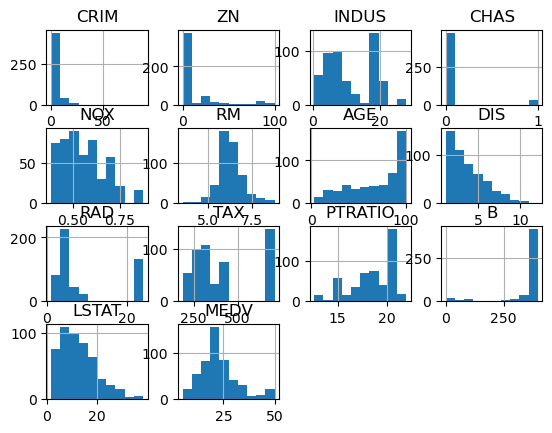

In [8]:
# columns data distribution
df.hist()

In [9]:
#categorical CHAS feature
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

Text(0.5, 1.0, 'House bounds Charles River')

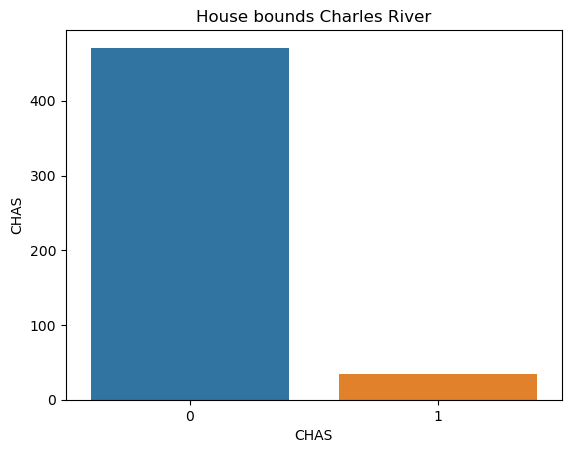

In [10]:
sns.countplot(x='CHAS', data= df)
plt.xlabel('CHAS')
plt.ylabel('CHAS')
plt.title('House bounds Charles River')

In [11]:
#Anova test on CHAS  feature( categorical)
from scipy.stats import f_oneway
chas_0= df[df['CHAS']==0]['MEDV']
chas_1= df[df['CHAS']==1]['MEDV']
f_statistic, p_value = f_oneway(chas_0, chas_1)
print("ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The p-value is less than 0.05. Reject the null hypothesis.")
    print("There are significant differences in the mean MEDV between the different levels of 'CHAS'.")
    print("You should consider taking CHAS feature when building the prediction model")
else:
    print("The p-value is greater than or equal to 0.05. Fail to reject the null hypothesis.")
    print("There are no significant differences in the mean MEDV between the different levels of 'CHAS'.")
    

ANOVA Test Results:
F-statistic: 15.97
P-value: 0.0001
The p-value is less than 0.05. Reject the null hypothesis.
There are significant differences in the mean MEDV between the different levels of 'CHAS'.
You should consider taking CHAS feature when building the prediction model


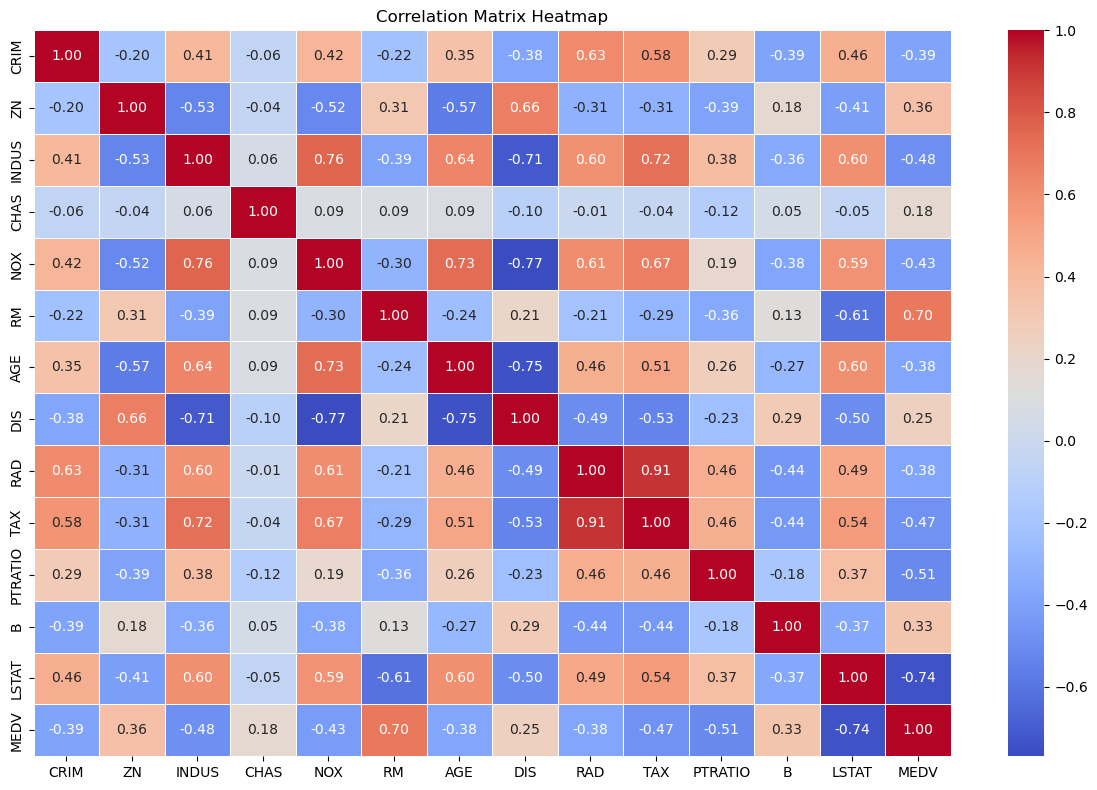

In [12]:
#correlation between  features
corr_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


Since we have a  high correlation between Features RAD and TAX, this might  have introduce the problem of redundancy in  data or multicollinearity which might lead to overfitting problem. The need  to investigate collinearity  is preferred to be done using the Variance Inflation Factor (VIF). VIF is a measure of multicollinearity in regression analysis. A VIF value greater than 5 or 10 is often considered indicative of multicollinearity.Higher VIF values suggest that the variance of the coefficient estimates is inflated due to multicollinearity

### checking  for linearity between  Fetaures and output (target)

In [13]:
#VIF test 
import statsmodels.api as sm
X = df['TAX']
y = df['RAD']
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
model = sm.OLS(y, X).fit()

# Calculate R-squared value
rsquared = model.rsquared

# Calculate VIF
vif = 1 / (1 - rsquared)
print("VIF for RAD:", vif)

VIF for RAD: 5.831425905034579


We have VIF=5.83 > 5 suggests that there is a moderate collinearity between RAD and TAX features. Since we lack the domain knowledge to determine the importance of the features, in addition, the  VIF value represents moderate collinearity  instead of  severe case, we won't remove  any of the features and considering that  both are important for the model. 

In [14]:
#correlation with target 
corr_with_target=corr_matrix['MEDV'].sort_values(ascending=False)
corr_with_target

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

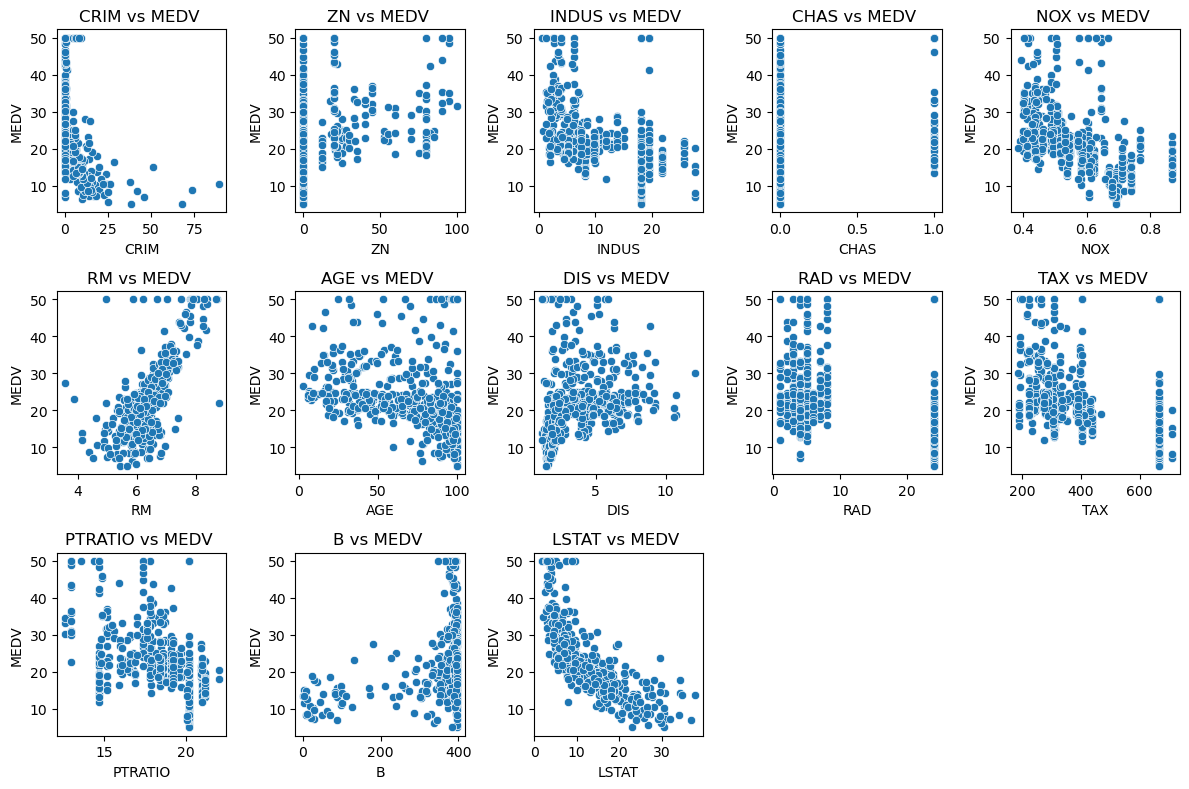

In [15]:
#ْ Scatter plots to  check the linearity/ non-linearity  between features and  target
features= df.columns[:-1]
num_features = len(features)
num_rows=3
num_columns= (num_features + num_rows - 1) // num_rows
plt.figure(figsize=(12,8))
for feature in features:
    plt.subplot(num_rows, num_columns, features.get_loc(feature) + 1 )
    sns.scatterplot(x=feature, y='MEDV', data=df)
    plt.title(f'{feature} vs MEDV ')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()
    

According  to the correlation between independent variables(features) and the target that shows  relatively low correlations with the target for most of the features, in addition to the results of the  scatter plots, there  would be non-linear relationships between  features and target. An approach to handle this is  applying  non linear algorithms  to predict the  target. Also, some feature engineering should be done to try to discover more patterns in data.


# Summary of Data Exploration:
1) No Null values
2) No Duplicated  rows
3) scatter plots  of features vs target shows that most of them have non-linear relationships with the  output, using non-linearities in  models might result in a better performance
4) Correlation between features and each other, there is a  high  correlation between TAX and RAD  features, that might introduce collinearity or redundancy in data, however,  after applying VIF test, we discovered that  the  Collinearity is moderate and not severe.
5) Correlations between most of features and target value are relatively small, introducing non-linearity.


### step 0:  splitting data  to train and test  datasets,  avoiding data leakage

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Training a base model

Mean Squared Error: 24.29111947497321
R-squared: 0.6687594935356362


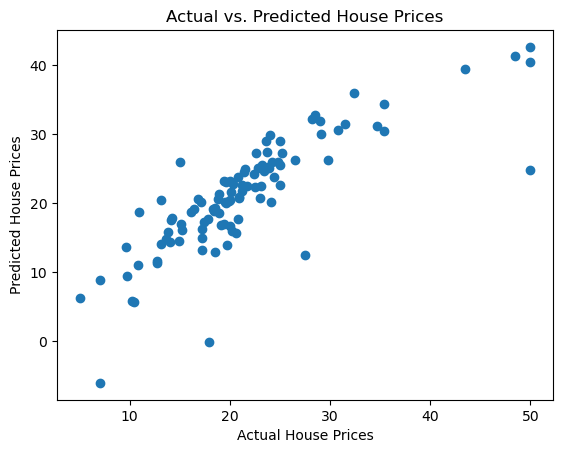

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the base model (linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# Data Preprocessing and Feature engineering

### Handling Skewed  Features


In [18]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Define the right_skewed columns
skewed_columns_right = ['DIS', 'LSTAT', 'CRIM', 'RAD']


# Initialize a PowerTransformer object
pt = PowerTransformer(method='yeo-johnson', standardize=True)  

# Fit and transform the training data
X_train[skewed_columns_right] = pt.fit_transform(X_train[skewed_columns_right])

# Transform the testing data
X_test[skewed_columns_right] = pt.transform(X_test[skewed_columns_right])

# Display the transformed training and testing data
print("Transformed Training Data:")
print(X_train.head())
print("\nTransformed Testing Data:")
print(X_test.head())


Transformed Training Data:
         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE       DIS       RAD  \
477  1.632418   0.0  18.10     0  0.6140  5.304  97.3 -0.820579  1.470669   
15   0.005892   0.0   8.14     0  0.5380  5.834  56.5  0.613586 -0.509927   
332 -0.989911  35.0   6.06     0  0.4379  6.031  23.3  1.281746 -2.286892   
423  1.441477   0.0  18.10     0  0.6140  6.103  85.1 -0.894412  1.470669   
19   0.106125   0.0   8.14     0  0.5380  5.727  69.5  0.305059 -0.509927   

       TAX  PTRATIO       B     LSTAT  
477  666.0     20.2  349.48  1.519160  
15   307.0     21.0  395.62 -0.422094  
332  304.0     16.9  362.25 -0.548273  
423  666.0     20.2    2.52  1.387242  
19   307.0     21.0  390.95  0.056144  

Transformed Testing Data:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE       DIS       RAD  \
173 -0.847940   0.0   4.05     0  0.510  6.416  84.1 -0.375809 -0.222363   
274 -0.934003  40.0   6.41     1  0.447  6.758  32.9  0.436044 -0.509927   
491 -0.815428  

In [19]:
#handling left-skewed attributes
X_train['PTRATIO'] = np.sqrt(X_train['PTRATIO']) # moderately skewed
X_test['PTRATIO'] = np.sqrt(X_test['PTRATIO'])




array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

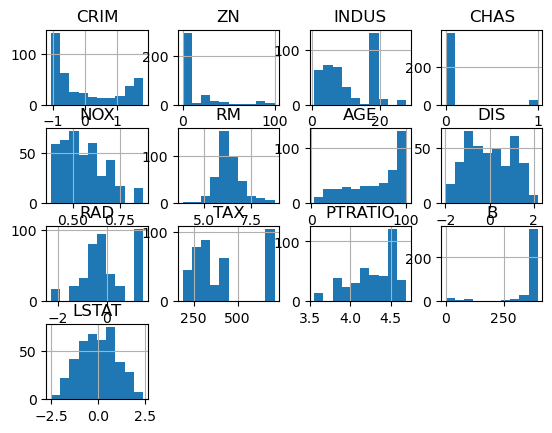

In [20]:
X_train.hist()

# Feature Engineering 



###  Interaction between NOX and INDUS 

In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Extract the features NOX and INDUS
nox_train = X_train['NOX'].values.reshape(-1, 1)  # Reshape to make it a column vector
indus_train = X_train['INDUS'].values.reshape(-1, 1)
nox_test = X_test['NOX'].values.reshape(-1, 1)  
indus_test = X_test['INDUS'].values.reshape(-1, 1)

# Initialize PolynomialFeatures to create interaction terms
interaction_poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


# Fit and transform the interaction terms
interaction_terms_train = interaction_poly.fit_transform(np.hstack([nox_train, indus_train]))
interaction_terms_test = interaction_poly.fit_transform(np.hstack([nox_test, indus_test]))

# Convert the result back to a DataFrame
interaction_df_train = pd.DataFrame(interaction_terms_train, columns=['NOX', 'INDUS','NOX_INDUS_interaction'])
interaction_df_test = pd.DataFrame(interaction_terms_test, columns=['NOX', 'INDUS','NOX_INDUS_interaction'])


# Concatenate the interaction terms DataFrame with the original data
X_train = pd.concat([X_train.reset_index(drop=True), interaction_df_train], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), interaction_df_test], axis=1)
#removing duplicated columns from new data frame (NOX and INDUS)

X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]


### Creating Age dummies 

<Axes: >

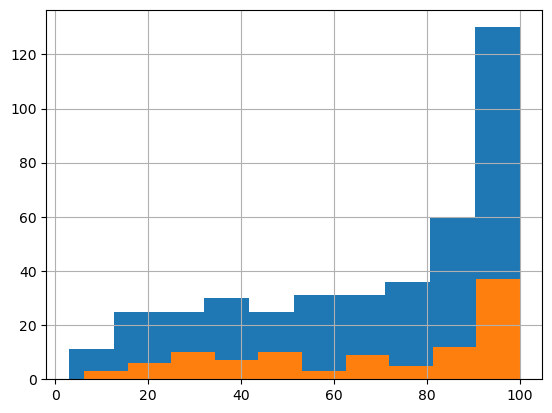

In [22]:

X_train['AGE'].hist()
X_test['AGE'].hist()

In [23]:
import pandas as pd

# Define age thresholds for creating age buckets
age_thresholds = [0, 25, 50, 75, 100]  # Example thresholds, adjust as needed

# Define labels for the age buckets
age_labels = ['newly_built', 'recent', 'old', 'historic']

# Categorize AGE into age buckets using cut function
X_train['Age_Bucket'] = pd.cut(X_train['AGE'], bins=age_thresholds, labels=age_labels, right=False)
X_test['Age_Bucket'] = pd.cut(X_test['AGE'], bins=age_thresholds, labels=age_labels, right=False)

# Convert age buckets into dummy variables (one-hot encoding)
age_dummies_train = pd.get_dummies(X_train['Age_Bucket'], prefix='Age_Bucket')
age_dummies_test = pd.get_dummies(X_test['Age_Bucket'], prefix='Age_Bucket')

# Concatenate the dummy variables with the original DataFrame
X_train = pd.concat([X_train, age_dummies_train], axis=1)
X_test = pd.concat([X_test, age_dummies_test], axis=1)

# Drop the original AGE and Age_Bucket columns if needed
X_train.drop(['AGE', 'Age_Bucket'], axis=1, inplace=True)
X_test.drop(['AGE', 'Age_Bucket'], axis=1, inplace=True)



In [24]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,NOX_INDUS_interaction,Age_Bucket_newly_built,Age_Bucket_recent,Age_Bucket_old,Age_Bucket_historic
0,1.632418,0.0,18.10,0,0.6140,5.304,-0.820579,1.470669,666.0,4.494441,349.48,1.519160,11.113400,False,False,False,True
1,0.005892,0.0,8.14,0,0.5380,5.834,0.613586,-0.509927,307.0,4.582576,395.62,-0.422094,4.379320,False,False,True,False
2,-0.989911,35.0,6.06,0,0.4379,6.031,1.281746,-2.286892,304.0,4.110961,362.25,-0.548273,2.653674,True,False,False,False
3,1.441477,0.0,18.10,0,0.6140,6.103,-0.894412,1.470669,666.0,4.494441,2.52,1.387242,11.113400,False,False,False,True
4,0.106125,0.0,8.14,0,0.5380,5.727,0.305059,-0.509927,307.0,4.582576,390.95,0.056144,4.379320,False,False,True,False


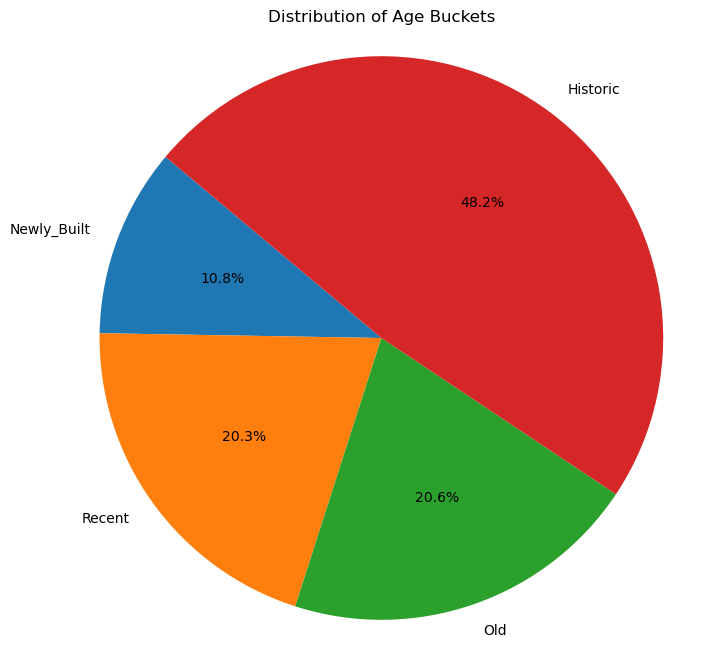

In [25]:
labels = ['Newly_Built', 'Recent', 'Old', 'Historic']
sizes = [
    age_dummies_train['Age_Bucket_newly_built'].sum(), 
    age_dummies_train['Age_Bucket_recent'].sum(), 
    age_dummies_train['Age_Bucket_old'].sum(), 
    age_dummies_train['Age_Bucket_historic'].sum()
]
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Buckets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Creating Feature (DIS/RAD)
creating a new feature representing the Distance Ratio of houses to two distinct urban features: weighted distances to employment centers and accessibility to radial highways.
#### steps:
1) applying min-max normalization for both features
2) applying the formula  Distance_ratio= DIS/ RAD,  to obth train and test data 



In [26]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the DIS and RAD features
X_train[['DIS_scaled', 'RAD_scaled']] = scaler.fit_transform(X_train[['DIS', 'RAD']])
X_test[['DIS_scaled', 'RAD_scaled']] = scaler.fit_transform(X_test[['DIS', 'RAD']])
# defining small value in denomenator to prevent  infinity value in  distance ratio
x = 1e-8

# Calculate the combined proximity feature
X_train['distance_ratio'] = X_train['DIS_scaled'] / (X_train['RAD_scaled'] + x)
X_test['distance_ratio'] = X_test['DIS_scaled'] / (X_test['RAD_scaled'] + x)




# Print the DataFrame to verify the new feature
X_train.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,NOX_INDUS_interaction,Age_Bucket_newly_built,Age_Bucket_recent,Age_Bucket_old,Age_Bucket_historic,DIS_scaled,RAD_scaled,distance_ratio
0,1.632418,0.0,18.10,0,0.6140,5.304,-0.820579,1.470669,666.0,4.494441,349.48,1.519160,11.113400,False,False,False,True,0.279942,1.000000,2.799419e-01
1,0.005892,0.0,8.14,0,0.5380,5.834,0.613586,-0.509927,307.0,4.582576,395.62,-0.422094,4.379320,False,False,True,False,0.623756,0.472904,1.318992e+00
2,-0.989911,35.0,6.06,0,0.4379,6.031,1.281746,-2.286892,304.0,4.110961,362.25,-0.548273,2.653674,True,False,False,False,0.783935,0.000000,7.839355e+07
3,1.441477,0.0,18.10,0,0.6140,6.103,-0.894412,1.470669,666.0,4.494441,2.52,1.387242,11.113400,False,False,False,True,0.262242,1.000000,2.622419e-01
4,0.106125,0.0,8.14,0,0.5380,5.727,0.305059,-0.509927,307.0,4.582576,390.95,0.056144,4.379320,False,False,True,False,0.549793,0.472904,1.162589e+00


In [27]:
# Drop the original DIS and RAD columns 
X_train.drop(['DIS_scaled', 'RAD_scaled'], axis=1, inplace=True)
X_test.drop(['DIS_scaled', 'RAD_scaled'], axis=1, inplace=True)

In [28]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,NOX_INDUS_interaction,Age_Bucket_newly_built,Age_Bucket_recent,Age_Bucket_old,Age_Bucket_historic,distance_ratio
CRIM,1.000000,-0.445359,0.738753,0.070569,0.796724,-0.274220,-0.728484,0.808489,0.852883,0.330099,-0.487150,0.569036,0.786596,-0.280296,-0.357867,-0.222411,0.411081,-0.199812
ZN,-0.445359,1.000000,-0.533489,-0.043754,-0.526414,0.274661,0.593625,-0.362966,-0.294267,-0.388288,0.178652,-0.439943,-0.503017,0.376215,0.411387,-0.107991,-0.387530,0.317091
INDUS,0.738753,-0.533489,1.000000,0.095158,0.770957,-0.398690,-0.763393,0.541739,0.702353,0.340148,-0.363151,0.602755,0.971514,-0.271079,-0.382338,-0.219647,0.487173,-0.210681
CHAS,0.070569,-0.043754,0.095158,1.000000,0.135476,0.111272,-0.117755,0.046459,0.007746,-0.111643,0.041666,-0.086788,0.121044,-0.060080,-0.058787,-0.035712,0.139510,-0.007839
NOX,0.796724,-0.526414,0.770957,0.135476,1.000000,-0.299615,-0.836201,0.571894,0.650247,0.147934,-0.368034,0.589087,0.882289,-0.357025,-0.401518,-0.208007,0.494592,-0.204399
RM,-0.274220,0.274661,-0.398690,0.111272,-0.299615,1.000000,0.253706,-0.185899,-0.281127,-0.342287,0.113347,-0.662562,-0.389639,0.126133,0.068822,0.033290,-0.011298,0.079626
DIS,-0.728484,0.593625,-0.763393,-0.117755,-0.836201,0.253706,1.000000,-0.522573,-0.609327,-0.200354,0.321548,-0.537980,-0.800016,0.393079,0.473150,0.134835,-0.497784,0.242277
RAD,0.808489,-0.362966,0.541739,0.046459,0.571894,-0.185899,-0.522573,1.000000,0.824786,0.389780,-0.392692,0.432328,0.563224,-0.196403,-0.249303,-0.118540,0.264121,-0.457684
TAX,0.852883,-0.294267,0.702353,0.007746,0.650247,-0.281127,-0.609327,0.824786,1.000000,0.436403,-0.442027,0.520145,0.725437,-0.184671,-0.257816,-0.230899,0.337909,-0.132223
PTRATIO,0.330099,-0.388288,0.340148,-0.111643,0.147934,-0.342287,-0.200354,0.389780,0.436403,1.000000,-0.169105,0.387195,0.278003,-0.141622,-0.150294,-0.010957,0.191230,-0.109760


# Evaluation After Data Preprocessing and Feature Engineering

 ### comparing the  linear regression after feature engineering

Mean Squared Error: 19.15814701719042
R-squared: 0.7387541431579125


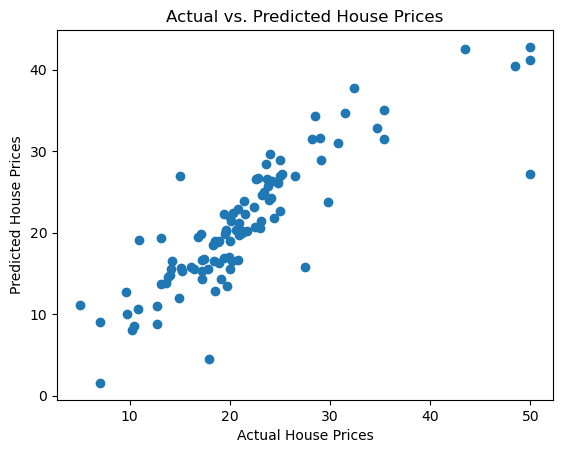

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the base model (linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

C:\Users\KMB\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.1542e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Squared Error: 19.314969175311013
R-squared: 0.7366156723009304


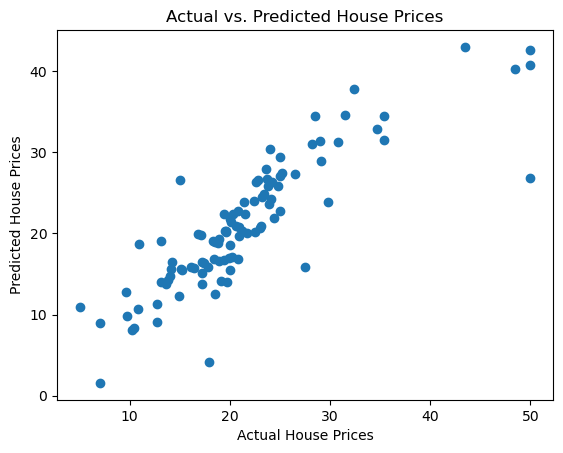

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_pred)
print("Mean Squared Error:", ridge_reg_mse)
print("R-squared:", ridge_reg_r2)

# Visualize results
plt.scatter(y_test, ridge_reg_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

Mean Squared Error: 14.552557226992246
R-squared: 0.8015572550624135


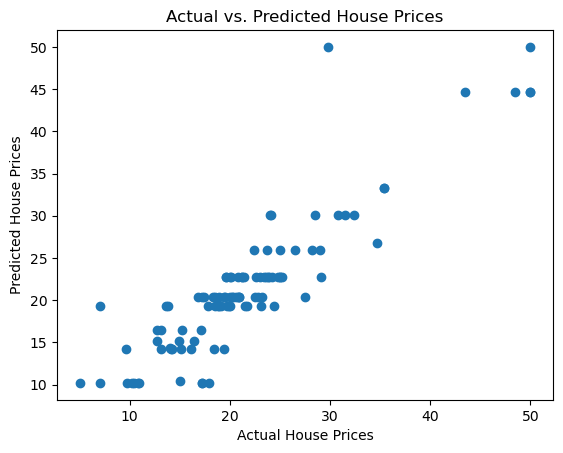

In [33]:
# Decision Tree
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
print("Mean Squared Error:", decision_tree_mse)
print("R-squared:", decision_tree_r2)

# Visualize results
plt.scatter(y_test, decision_tree_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# Conclusion

After applying Data preprocessing and Feature engineering, it seems  that, compared to the base model (Linear regression), the models perform better performance. Feature Skeweness was handled, depending on the nature of the skewness. Furthermore, new features were created to create interactions between features and presents some sort of non-linearity for discovering more patterns hidden in the data. The best performing Algorithm on Data after preprocessing is Decison trees (contained hyper parameter tuning, max depth). This  performance of Decision trees may be due to the new features  created that introduced kind of complexity or non-linearity.